In [190]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import numpy as np
import re
import mygene
import random

from scipy import stats

from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale

from boruta import BorutaPy
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.decomposition import PCA

from sklearn.feature_selection import VarianceThreshold

import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.precision", 8)

### Get clean ensembl number

In [225]:
genes = ['ENSG00000235734.4',
  'ENSG00000229237.2',
  'ENSG00000224126.2',
  'ENSG00000234743.1',
  'ENSG00000262533.1',
  'ENSG00000123500.9',
  'ENSG00000279473.1',
  'ENSG00000241431.1',
  'ENSG00000230838.1',
  'ENSG00000219928.2',
  'ENSG00000244538.1',
  'ENSG00000230734.1',
  'ENSG00000204429.4']

In [226]:
df = pd.DataFrame(genes)
df.columns = ["ensembls"]
df

,ensembls
0,ENSG00000235734.4
1,ENSG00000229237.2
2,ENSG00000224126.2
3,ENSG00000234743.1
4,ENSG00000262533.1
5,ENSG00000123500.9
6,ENSG00000279473.1
7,ENSG00000241431.1
8,ENSG00000230838.1
9,ENSG00000219928.2


In [227]:
df["ensembls"] = df["ensembls"].apply(lambda value: re.sub("\.\d+", "", value))
df

,ensembls
0,ENSG00000235734
1,ENSG00000229237
2,ENSG00000224126
3,ENSG00000234743
4,ENSG00000262533
5,ENSG00000123500
6,ENSG00000279473
7,ENSG00000241431
8,ENSG00000230838
9,ENSG00000219928


### MyGene Library

In [228]:
mg = mygene.MyGeneInfo()
df_mg = mg.getgenes(df["ensembls"], fields="symbol, name, summary", as_dataframe=True) # fields="symbol,name,summary"

querying 1-13...done.


In [229]:
df_mg.reset_index()

,query,_id,_score,name,notfound,summary,symbol
0,ENSG00000235734,ENSG00000235734,6.7780137,high mobility group nucleosome binding domain ...,NaN,NaN,HMGN1P36
1,ENSG00000229237,ENSG00000229237,6.7555960,high mobility group nucleosome binding domain ...,NaN,NaN,HMGN1P37
2,ENSG00000224126,ENSG00000224126,6.7652040,ubiquitin conjugating enzyme E2 S pseudogene 2,NaN,NaN,UBE2SP2
3,ENSG00000234743,ENSG00000234743,6.7495914,eukaryotic translation initiation factor 5A ps...,NaN,NaN,EIF5AP4
4,ENSG00000262533,ENSG00000262533,21.0096280,NaN,NaN,NaN,AC090617.3
5,ENSG00000123500,1300,19.6020500,collagen type X alpha 1 chain,NaN,This gene encodes the alpha chain of type X co...,COL10A1
6,ENSG00000279473,NaN,NaN,NaN,True,NaN,NaN
7,ENSG00000241431,ENSG00000241431,6.7725350,ribosomal protein L37 pseudogene 6,NaN,NaN,RPL37P6
8,ENSG00000230838,ENSG00000230838,20.9462760,long intergenic non-protein coding RNA 1614,NaN,NaN,LINC01614
9,ENSG00000219928,ENSG00000219928,20.9237330,NaN,NaN,NaN,AL161787.1


### Other

In [28]:
df1 = pd.read_csv("Results_['Breast']_['Primary Tumor', 'Normal Tissue'].csv")
df1.head()

,Unnamed: 0,Total Count,Intogen,Gradient Boost Classifier,Recursive Feature Elimination,Elastic Net,Boruta Tree,Importances: Gradient Boost Classifier,Importances: Recursive Feature Elimination,Importances: Elastic Net,Importances: Boruta Tree,Importances: Intogen
0,ENSG00000240036.4,4,0,1,1,1,1,0.0,0.0,0.0,0.0,0.0
1,ENSG00000259357.2,4,0,1,1,1,1,0.0,0.0,0.0,0.0,0.0
2,ENSG00000268938.2,3,0,0,1,1,1,0.0,0.0,0.0,0.0,0.0
3,ENSG00000254398.1,3,0,0,1,1,1,0.0,0.0,0.0,0.0,0.0
4,ENSG00000279473.1,3,0,0,1,1,1,0.0,0.0,0.0,0.0,0.0


In [29]:
df1["Intogen"].unique()

array([0, 1])

In [30]:
df2 = df1[df1["Intogen"]==1].sum()

In [31]:
df2 = pd.DataFrame(df2)
df2.columns = ["results"]
df2

,results
Unnamed: 0,ENSG00000163513ENSG00000133703ENSG00000100284E...
Total Count,129
Intogen,129
Gradient Boost Classifier,0
Recursive Feature Elimination,0
Elastic Net,0
Boruta Tree,0
Importances: Gradient Boost Classifier,0
Importances: Recursive Feature Elimination,0
Importances: Elastic Net,0


In [32]:
df2.iloc[3:7]

,results
Gradient Boost Classifier,0
Recursive Feature Elimination,0
Elastic Net,0
Boruta Tree,0


In [39]:
with pd.option_context('display.float_format', '{:0.5f}'.format):
    print(df2)

                                                                                      results
Unnamed: 0                                  ENSG00000163513ENSG00000133703ENSG00000100284E...
Total Count                                                                               129
Intogen                                                                                   129
Gradient Boost Classifier                                                                   0
Recursive Feature Elimination                                                               0
Elastic Net                                                                                 0
Boruta Tree                                                                                 0
Importances: Gradient Boost Classifier                                                0.00000
Importances: Recursive Feature Elimination                                            0.00000
Importances: Elastic Net                                    

### Translating genes

In [2]:
# load df

df_colon = pd.read_csv("../Output/Result_Colon.csv")
df_colon.head()

,Unnamed: 0,Total Count,Intogen,Gradient Boost Classifier,Recursive Feature Elimination,Elastic Net,Boruta Tree,Importances: Gradient Boost Classifier,Importances: Recursive Feature Elimination,Importances: Elastic Net,Importances: Boruta Tree,Importances: Intogen
0,ENSG00000149451,4,0,1,1,1,1,0.00097350,1.0,-0.00210667,0.0,0.0
1,ENSG00000175832,4,0,1,1,1,1,0.00482914,1.0,0.00397637,0.0,0.0
2,ENSG00000062038,4,0,1,1,1,1,0.73205975,1.0,0.00844918,0.1,0.0
3,ENSG00000143536,3,0,0,1,1,1,0.00000000,1.0,-0.00581666,0.0,0.0
4,ENSG00000257524,3,0,1,1,1,0,0.00000000,1.0,-0.00049392,0.0,0.0


In [79]:
# using MyGene library to get info

ensembls = df_colon["Unnamed: 0"].values.tolist()

mg = mygene.MyGeneInfo()
df_mg = mg.getgenes(ensembls, fields="symbol,name,summary", as_dataframe=True) # fields="symbol,name,summary"
df_mg.head()

querying 1-1000...done.
querying 1001-1100...done.


,_id,_score,name,summary,symbol
query,,,,,
ENSG00000149451,80332,21.006630,ADAM metallopeptidase domain 33,This gene encodes a member of the ADAM (a disi...,ADAM33
ENSG00000175832,2118,20.951118,ETS variant 4,NaN,ETV4
ENSG00000062038,1001,19.691100,cadherin 3,This gene encodes a classical cadherin of the ...,CDH3
ENSG00000143536,49860,21.011843,cornulin,This gene encodes a member of the 'fused gene'...,CRNN
ENSG00000257524,ENSG00000257524,20.971270,NaN,NaN,AL157935.2


In [86]:
# copy df_colon and do a little cleanup

df_colon_copy = df_colon.copy()
df_colon_copy.rename(columns={ 'Unnamed: 0': 'ensembl' }, inplace=True)
df_colon_copy.head()

# merge by specific columns df_mg (right dataframe) into df_colon (left data frame), 
df_merged = df_colon_copy.merge(df_mg, left_on='ensembl', right_on='query')

# drop 'query' which was merged from df_mg as it is a duplicate of ensembl column
#df_merged.drop(columns=['query'], axis='columns', inplace=True)
df_merged.head()

,ensembl,Total Count,Intogen,Gradient Boost Classifier,Recursive Feature Elimination,Elastic Net,Boruta Tree,Importances: Gradient Boost Classifier,Importances: Recursive Feature Elimination,Importances: Elastic Net,Importances: Boruta Tree,Importances: Intogen,_id,_score,name,summary,symbol
0,ENSG00000149451,4,0,1,1,1,1,0.00097350,1.0,-0.00210667,0.0,0.0,80332,21.006630,ADAM metallopeptidase domain 33,This gene encodes a member of the ADAM (a disi...,ADAM33
1,ENSG00000175832,4,0,1,1,1,1,0.00482914,1.0,0.00397637,0.0,0.0,2118,20.951118,ETS variant 4,NaN,ETV4
2,ENSG00000062038,4,0,1,1,1,1,0.73205975,1.0,0.00844918,0.1,0.0,1001,19.691100,cadherin 3,This gene encodes a classical cadherin of the ...,CDH3
3,ENSG00000143536,3,0,0,1,1,1,0.00000000,1.0,-0.00581666,0.0,0.0,49860,21.011843,cornulin,This gene encodes a member of the 'fused gene'...,CRNN
4,ENSG00000257524,3,0,1,1,1,0,0.00000000,1.0,-0.00049392,0.0,0.0,ENSG00000257524,20.971270,NaN,NaN,AL157935.2


### Scaling importances

In [95]:
df_scaled_impp = df_merged.copy()
df_scaled_impp.head()

,ensembl,Total Count,Intogen,Gradient Boost Classifier,Recursive Feature Elimination,Elastic Net,Boruta Tree,Importances: Gradient Boost Classifier,Importances: Recursive Feature Elimination,Importances: Elastic Net,Importances: Boruta Tree,Importances: Intogen,_id,_score,name,summary,symbol
0,ENSG00000149451,4,0,1,1,1,1,0.00097350,1.0,-0.00210667,0.0,0.0,80332,21.006630,ADAM metallopeptidase domain 33,This gene encodes a member of the ADAM (a disi...,ADAM33
1,ENSG00000175832,4,0,1,1,1,1,0.00482914,1.0,0.00397637,0.0,0.0,2118,20.951118,ETS variant 4,NaN,ETV4
2,ENSG00000062038,4,0,1,1,1,1,0.73205975,1.0,0.00844918,0.1,0.0,1001,19.691100,cadherin 3,This gene encodes a classical cadherin of the ...,CDH3
3,ENSG00000143536,3,0,0,1,1,1,0.00000000,1.0,-0.00581666,0.0,0.0,49860,21.011843,cornulin,This gene encodes a member of the 'fused gene'...,CRNN
4,ENSG00000257524,3,0,1,1,1,0,0.00000000,1.0,-0.00049392,0.0,0.0,ENSG00000257524,20.971270,NaN,NaN,AL157935.2


In [97]:
scaler = MinMaxScaler()

df_scaled_impp['Scaled_Imp_GB'] = scaler.fit_transform(df_scaled_impp['Importances: Gradient Boost Classifier'].values.reshape(-1,1))
df_scaled_impp['Scaled_Imp_RFE'] = scaler.fit_transform(df_scaled_impp['Importances: Recursive Feature Elimination'].values.reshape(-1,1))
df_scaled_impp['Scaled_Imp_Elastic'] = scaler.fit_transform(df_scaled_impp['Importances: Elastic Net'].values.reshape(-1,1))
df_scaled_impp['Scaled_Imp_Boruta'] = scaler.fit_transform(df_scaled_impp['Importances: Boruta Tree'].values.reshape(-1,1))
df_scaled_impp['Scaled_Imp_Intogen'] = scaler.fit_transform(df_scaled_impp['Importances: Intogen'].values.reshape(-1,1))

df_scaled_impp.head()

,ensembl,Total Count,Intogen,Gradient Boost Classifier,Recursive Feature Elimination,Elastic Net,Boruta Tree,Importances: Gradient Boost Classifier,Importances: Recursive Feature Elimination,Importances: Elastic Net,...,_id,_score,name,summary,symbol,Scaled_Imp_GB,Scaled_Imp_RFE,Scaled_Imp_Elastic,Scaled_Imp_Boruta,Scaled_Imp_Intogen
0,ENSG00000149451,4,0,1,1,1,1,0.00097350,1.0,-0.00210667,...,80332,21.006630,ADAM metallopeptidase domain 33,This gene encodes a member of the ADAM (a disi...,ADAM33,0.00132980,1.0,0.26006082,0.00000000,0.0
1,ENSG00000175832,4,0,1,1,1,1,0.00482914,1.0,0.00397637,...,2118,20.951118,ETS variant 4,NaN,ETV4,0.00659664,1.0,0.68646746,0.00000000,0.0
2,ENSG00000062038,4,0,1,1,1,1,0.73205975,1.0,0.00844918,...,1001,19.691100,cadherin 3,This gene encodes a classical cadherin of the ...,CDH3,1.00000000,1.0,1.00000000,0.50477486,0.0
3,ENSG00000143536,3,0,0,1,1,1,0.00000000,1.0,-0.00581666,...,49860,21.011843,cornulin,This gene encodes a member of the 'fused gene'...,CRNN,0.00000000,1.0,0.00000000,0.00000000,0.0
4,ENSG00000257524,3,0,1,1,1,0,0.00000000,1.0,-0.00049392,...,ENSG00000257524,20.971270,NaN,NaN,AL157935.2,0.00000000,1.0,0.37311066,0.00000000,0.0


### PCA

In [107]:
import random

In [179]:
#p = 0.3  # 30% of the lines
# keep the header, then take only 10% of lines
# if random from [0,1] interval is greater than 0.1 the row will be skipped
#df_all = pd.read_csv(
#         "../Output/Chunk_AllCancers.csv",
#         header=0, 
#         skiprows=lambda i: i>0 and random.random() > p)

df_all = pd.read_csv("../Output/Chunk_AllCancers.csv")
df_all.head()

,Unnamed: 0,label,ENSG00000167578,ENSG00000078237,ENSG00000146083,ENSG00000158486,ENSG00000198242,ENSG00000134108,ENSG00000172137,ENSG00000276644,...,ENSG00000107863,ENSG00000213782,ENSG00000146707,ENSG00000158417,ENSG00000089177,ENSG00000186115,ENSG00000009694,ENSG00000123685,ENSG00000105063,ENSG00000181518
0,TCGA-C8-A1HL-01,1_breast,4.9782,2.6624,3.9580,-0.3752,10.7877,5.7415,0.6239,3.3450,...,3.2251,4.9016,2.4727,5.6511,5.1094,-9.9658,-6.5064,1.0293,4.4095,-9.9658
1,TCGA-EW-A2FS-01,1_breast,5.7035,1.2696,4.2189,-4.2934,10.1460,5.7801,1.4011,4.0532,...,3.5863,4.9327,3.1556,5.8510,4.4277,-6.5064,-3.0469,1.4600,4.4081,-9.9658
2,TCGA-B6-A402-01,1_breast,4.1252,1.6234,5.0180,-2.8262,9.8935,4.8929,2.9729,-3.6259,...,5.1107,5.3013,3.9801,5.8592,3.1669,-9.9658,-5.0116,2.5061,4.4490,-9.9658
3,TCGA-A2-A3XX-01,1_breast,4.8734,1.5998,4.1859,-2.1140,9.8904,4.7247,9.4821,-3.4580,...,4.1676,5.1169,4.4223,5.7195,3.0393,-6.5064,-5.5735,2.0707,4.1078,-9.9658
4,TCGA-Z7-A8R5-01,1_breast,5.4973,1.3846,3.3017,-5.5735,11.1398,4.6651,3.2080,1.4600,...,2.6114,4.7176,4.0875,3.6578,2.1509,-9.9658,-4.6082,2.8522,4.4900,-9.9658


In [109]:
df_all.tail()

,Unnamed: 0,label,ENSG00000167578,ENSG00000078237,ENSG00000146083,ENSG00000158486,ENSG00000198242,ENSG00000134108,ENSG00000172137,ENSG00000276644,...,ENSG00000107863,ENSG00000213782,ENSG00000146707,ENSG00000158417,ENSG00000089177,ENSG00000186115,ENSG00000009694,ENSG00000123685,ENSG00000105063,ENSG00000181518
35,GTEX-12WSH-1526-SM-5BC5W,0_skin,4.4758,0.6145,4.9919,-0.6643,10.9326,5.9110,-0.1031,-0.7108,...,3.2722,5.5167,3.8759,5.1453,2.0500,-1.0262,-0.6416,1.7141,4.7198,-9.9658
36,TCGA-BJ-A4O8-01,1_thyroid,5.4446,2.7422,4.7645,-1.7809,10.0562,5.9444,-0.8599,-2.6349,...,3.5923,5.4377,3.0585,4.5577,1.8201,-9.9658,3.5994,1.9264,5.1400,-9.9658
37,TCGA-EM-A4G1-01,1_thyroid,4.6288,1.3901,4.0295,-9.9658,10.5970,5.7326,-2.1140,-2.6349,...,3.0234,5.6710,1.8722,3.9571,2.1830,-2.9324,3.1765,-0.5756,4.5473,-9.9658
38,TCGA-DJ-A3UP-01,1_thyroid,4.8812,1.4859,4.3744,-3.0469,10.2926,5.6162,-1.5951,-2.7274,...,3.4237,5.5708,2.3816,5.0597,3.1475,-9.9658,5.0273,0.3685,4.9379,-9.9658
39,TCGA-EM-A2OZ-01,1_thyroid,4.8798,2.7657,4.5311,-9.9658,10.4109,6.4029,-1.3921,-3.4580,...,3.6894,5.9423,3.0995,5.1792,2.8681,-9.9658,3.0961,1.1382,5.2099,-9.9658


In [180]:
# scaling

df_all_X = df_all.drop(["Unnamed: 0", "label"], axis=1)

minmax_scaler = MinMaxScaler()
df_all_X_scaled = minmax_scaler.fit_transform(df_all_X)

In [192]:
pca = PCA(n_components=3)
princ_comp = pca.fit_transform(df_all_X_scaled)
principalDf = pd.DataFrame(data=princ_comp, columns=["component_1", "component_2", "component_3"])
principalDf.head()

,component_1,component_2,component_3
0,7.32450857,-1.30845404,-0.56246546
1,2.89484894,-0.79522791,-1.03450941
2,5.28927468,1.94723112,-1.01973019
3,3.30173468,-0.30651842,-3.29009404
4,3.79137303,0.39120017,0.54369723


In [193]:
pca.explained_variance_ratio_

array([0.10728561, 0.07849444, 0.06686405])

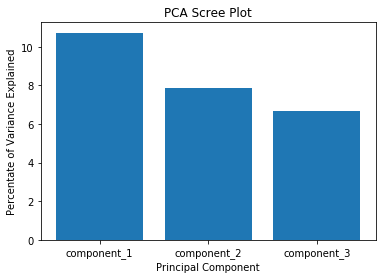

In [183]:
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns=["component_1", "component_2", "component_3"]
plt.bar(x= range(1,4), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

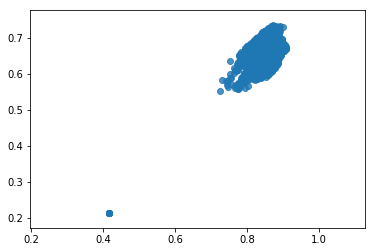

In [184]:
X_new = pca.inverse_transform(princ_comp)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

Text(0, 0.5, 'PC3')

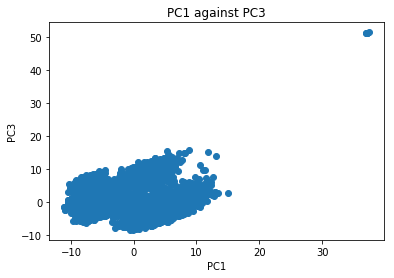

In [185]:
plt.scatter(principalDf.component_1, principalDf.component_3)
plt.title('PC1 against PC3')
plt.xlabel('PC1')
plt.ylabel('PC3')

Text(0, 0.5, 'PC2')

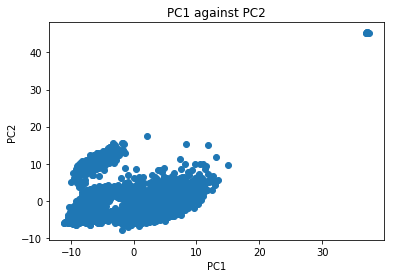

In [186]:
plt.scatter(principalDf.component_1, principalDf.component_2)
plt.title('PC1 against PC2')
plt.xlabel('PC1')
plt.ylabel('PC2')

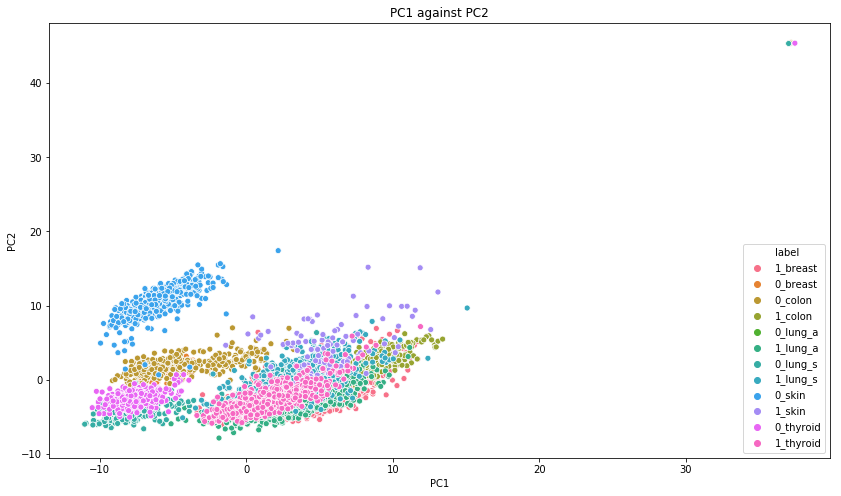

In [187]:
fig, ax = plt.subplots(figsize=(14,8))

sns.scatterplot(x=principalDf.component_1, y=principalDf.component_2, data=principalDf, hue=df_all["label"], ax=ax)
plt.title('PC1 against PC2')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower right')
plt.show()

In [188]:
my_colors=df_all['label'].astype('category').cat.codes

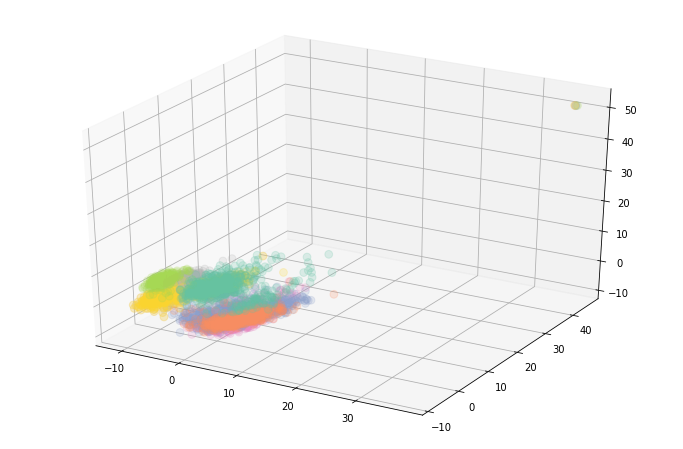

In [189]:
fig = plt.figure(figsize=(12,8))
#ax = Axes3D(fig, rect=[0, 0, .7, 1], elev=48, azim=134)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(principalDf.component_1, principalDf.component_2, principalDf.component_3, c=my_colors, cmap="Set2_r", s=60, alpha=0.2)

In [194]:
pca_trafo = PCA().fit(df_all_X_scaled)
plt.semilogy(pca_trafo.explained_variance_ratio, '--o')

AttributeError: 'PCA' object has no attribute 'explained_variance_ratio'

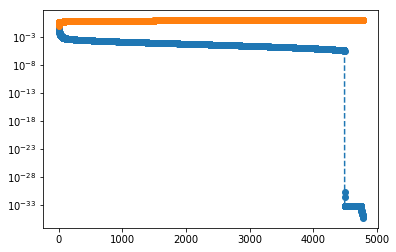

In [211]:
plt.semilogy(pca_trafo.explained_variance_ratio_, '--o')
plt.semilogy(pca_trafo.explained_variance_ratio_.cumsum(), '--o')
plt.show()

### PCA Cancer only

In [198]:
# cancer only

df_cancer = df_all[df_all["label"].str.startswith('1')]

In [199]:
# scaling

df_cancer_X = df_cancer.drop(["Unnamed: 0", "label"], axis=1)

minmax_scaler = MinMaxScaler()
df_cancer_X_scaled = minmax_scaler.fit_transform(df_cancer_X)

In [201]:
pca_cancer = PCA(n_components=3)
princ_comp_cancer = pca_cancer.fit_transform(df_cancer_X_scaled)
principalDf_cancer = pd.DataFrame(data=princ_comp_cancer, columns=["component_1", "component_2", "component_3"])
principalDf_cancer.head()

,component_1,component_2,component_3
0,-1.16648518,-0.29912923,8.15767675
1,0.27857337,0.84195320,5.04018514
2,1.43777774,-3.31201031,4.05817118
3,-1.99218183,-2.44451015,0.88605879
4,4.91415887,1.89279726,4.75204910


In [202]:
pca_cancer.explained_variance_ratio_

array([0.10338101, 0.09225079, 0.05877974])

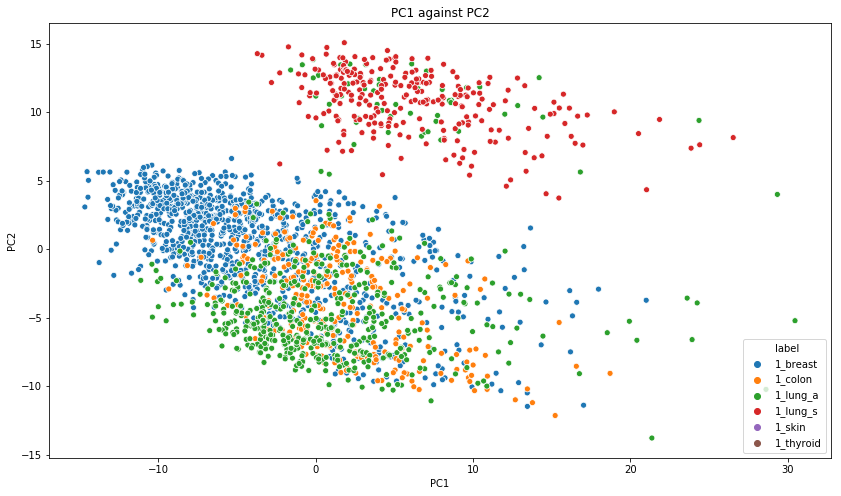

In [204]:
fig, ax = plt.subplots(figsize=(14,8))

sns.scatterplot(x=principalDf_cancer.component_1, y=principalDf_cancer.component_2, data=principalDf_cancer, hue=df_cancer["label"], ax=ax)
plt.title('PC1 against PC2')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower right')
plt.show()

In [215]:
pca_trafo_cancer = PCA().fit(df_cancer_X_scaled)


In [1]:
#sns.heatmap(np.log(pca_trafo_cancer.inverse_transform(np.eye(df_cancer_X_scaled.shape[1]))), cmap="hot", cbar=False)

### filter top

In [70]:
# cancer result paths

skin_cancer_result = "../Output/Result_Skin.csv"
breast_cancer_result = "../Output/Result_Breast.csv"
thyr_cancer_result = "../Output/Result_Thyroid_ThyroidGland.csv"
colon_cancer_result = "../Output/Result_Colon.csv"
lungA_cancer_result = "../Output/Result_LungAdenocarcinoma_Lung.csv"
lungS_cancer_result = "../Output/Result_LungSquamousCellCarcinoma_Lung.csv"


# cancer chunk paths

skin_cancer_chunk = "../Output/Chunk_Skin.csv"
breast_cancer_chunk = "../Output/Chunk_Breast.csv"
thyr_cancer_chunk = "../Output/Chunk_Thyroid_ThyroidGland.csv"
colon_cancer_chunk = "../Output/Chunk_Colon.csv"
lungA_cancer_chunk = "../Output/Chunk_LungAdenocarcinoma_Lung.csv"
lungS_cancer_chunk = "../Output/Chunk_LungSquamousCellCarcinoma_Lung.csv"

In [90]:
df_skin = pd.read_csv("../Output/Result_Skin.csv", index_col=0)
df_skin = df_skin.head(5)
df_skin

,Total Count,Intogen,Gradient Boost Classifier,Recursive Feature Elimination,Elastic Net,Boruta Tree,Importances: Gradient Boost Classifier,Importances: Recursive Feature Elimination,Importances: Elastic Net,Importances: Boruta Tree,Importances: Intogen
ENSG00000110723,3,0,1,1,0,1,0.00019414,1.0,0.00000000,0.09949747,0.0
ENSG00000213927,3,0,0,1,1,1,0.00000000,1.0,-0.00313712,0.00000000,0.0
ENSG00000250254,3,0,1,1,1,0,0.00000000,1.0,-0.00021130,0.00000000,0.0
ENSG00000090932,3,0,0,1,1,1,0.00000000,1.0,0.00069465,0.00000000,0.0
ENSG00000136826,3,1,1,0,0,1,0.00262523,0.0,0.00000000,0.00000000,4.0


In [92]:
cols = skin.index.tolist()
cols

['ENSG00000110723',
 'ENSG00000213927',
 'ENSG00000250254',
 'ENSG00000090932',
 'ENSG00000136826',
 'ENSG00000115361',
 'ENSG00000170074']

In [197]:
df_chunk_skin = pd.read_csv("../Output/Chunk_Skin.csv", index_col=0)

In [239]:
bla = df_chunk_skin.groupby(df_chunk_skin["label"]).count()

In [247]:
bla

,ENSG00000167578,ENSG00000078237,ENSG00000146083,ENSG00000158486,ENSG00000198242,ENSG00000134108,ENSG00000172137,ENSG00000276644,ENSG00000094963,ENSG00000182141,...,ENSG00000107863,ENSG00000213782,ENSG00000146707,ENSG00000158417,ENSG00000089177,ENSG00000186115,ENSG00000009694,ENSG00000123685,ENSG00000105063,ENSG00000181518
label,,,,,,,,,,,,,,,,,,,,,
0,556,556,556,556,556,556,556,556,556,556,...,556,556,556,556,556,556,556,556,556,556
1,102,102,102,102,102,102,102,102,102,102,...,102,102,102,102,102,102,102,102,102,102


In [249]:
bla.iloc[0,0]

556

In [248]:
bla.iloc[1,0]

102

In [199]:
tcga = df_chunk_skin[df_chunk_skin["label"]==1].index.values.tolist()
gtex = df_chunk_skin[df_chunk_skin["label"]==0].index.values.tolist()

In [213]:
cols_tcga = random.sample(tcga,k=97)
cols_gtex = random.sample(gtex,k=552)

In [214]:
len(cols_gtex)

552

In [217]:
df_chunk_skin.columns = [(re.sub('\.\d+', '', gene)) for gene in df_chunk_skin.columns]

In [218]:
df_skin_filt_cols = df_chunk_skin.T[cols_tcga + cols_gtex]

In [111]:
skin_filter = skin_filter.T
#skin_filter

In [65]:
#skin = df_skin.head(5)
#cols = skin.index.tolist()

#chunk_skin = pd.read_csv("../Output/Chunk_Skin.csv")

#chunk_skin.columns = [(re.sub('\.\d+', '', gene)) for gene in chunk_skin.columns]

#skin_filter = chunk_skin[cols]
#skin_filter = skin_filter.T

#skin_filter["cancer"] = "skin"
#skin_filter

In [112]:
def cancer_filter(cancer_result_path, cancer_chunk_path, cancer):
    df_cancer = pd.read_csv(cancer_result_path, index_col=0).head(7)
    cols = df_cancer.index.tolist()
    
    chunk_cancer = pd.read_csv(cancer_chunk_path, index_col=0)
    #chunk_cancer.columns = [(re.sub('\.\d+', '', gene)) for gene in chunk_cancer.columns]

    cancer_filter = chunk_cancer[cols]
    cancer_filter = cancer_filter.T
    cancer_filter["cancer"] = cancer
    
    #print(cancer_filter)
    #print(type(cancer_filter))
    
    return cancer_filter

In [113]:
skin = cancer_filter(skin_cancer_result, skin_cancer_chunk, "skin")
breast = cancer_filter(breast_cancer_result, breast_cancer_chunk, "breast")
thyr = cancer_filter(thyr_cancer_result, thyr_cancer_chunk, "thyr")
colon = cancer_filter(colon_cancer_result, colon_cancer_chunk, "colon")
lungA = cancer_filter(lungA_cancer_result, lungA_cancer_chunk, "lungA")
lungS = cancer_filter(lungS_cancer_result, lungS_cancer_chunk, "lungS")

In [114]:
df_final = skin.append([breast, thyr, colon, lungA, lungS])

In [115]:
skin.head()

,GTEX-ZF29-0926-SM-4WKFZ,GTEX-TSE9-0126-SM-3DB83,GTEX-12WSK-2326-SM-5GCOH,GTEX-P4PQ-0126-SM-2S1NM,TCGA-FR-A3R1-01,TCGA-EB-A41A-01,GTEX-132NY-0326-SM-5IJBL,GTEX-11O72-0626-SM-5PNYE,GTEX-Y8LW-1526-SM-5IFHL,GTEX-13PVR-2326-SM-5QGR1,...,GTEX-139TT-2126-SM-5LZWC,GTEX-Y3I4-1726-SM-4TT89,GTEX-13OVH-0526-SM-5L3E6,GTEX-12WSN-1426-SM-5GCO6,GTEX-ZXG5-0126-SM-5GIEU,GTEX-ZYFD-0626-SM-5E44E,GTEX-QDT8-0126-SM-48TZ1,GTEX-148VI-1626-SM-5SI6E,GTEX-1122O-2126-SM-5EGIR,cancer
ENSG00000110723,4.6130,4.1376,4.2541,3.2707,-2.8262,-2.4659,3.7709,3.5324,4.3313,4.3031,...,3.9663,3.6950,4.0064,1.6512,5.2461,1.3340,3.5779,4.4556,4.2381,skin
ENSG00000213927,7.2549,6.3174,7.1463,6.8689,-3.8160,-9.9658,8.8136,7.8996,7.4079,6.2939,...,8.4549,7.1433,9.6237,-0.3022,7.4274,8.2272,7.2909,6.8048,8.3796,skin
ENSG00000250254,-1.4305,-2.3147,-9.9658,-2.1140,-9.9658,-9.9658,-3.4580,-2.1779,-9.9658,-9.9658,...,-9.9658,-2.3884,-1.7809,-3.1714,-3.4580,-3.1714,-1.4305,-2.4659,-2.4659,skin
ENSG00000090932,-9.9658,-3.3076,-4.0350,-9.9658,2.1509,-0.1665,-4.6082,-4.0350,-3.6259,-3.6259,...,-5.0116,-3.4580,-5.0116,-9.9658,-9.9658,-2.9324,-5.5735,-4.6082,-4.6082,skin
ENSG00000136826,8.9650,8.6716,8.1717,7.9425,1.5563,3.0619,8.2200,8.5022,8.8546,8.5560,...,8.3582,8.0553,8.2943,6.9988,9.1566,7.0523,7.8297,8.1773,8.8116,skin


In [118]:
df_final.head()

,GTEX-1117F-2826-SM-5GZXL,GTEX-111CU-0226-SM-5GZXC,GTEX-111CU-0326-SM-5GZXO,GTEX-111CU-1126-SM-5EGIM,GTEX-111CU-1226-SM-5EGIN,GTEX-111CU-1426-SM-5GZYP,GTEX-111CU-1926-SM-5GZYZ,GTEX-111FC-0126-SM-5N9DL,GTEX-111FC-1026-SM-5GZX1,GTEX-111FC-1126-SM-5GZWU,...,TCGA-XV-A9W5-01,TCGA-XV-AAZV-01,TCGA-XV-AAZW-01,TCGA-XV-AAZY-01,TCGA-XX-A899-01,TCGA-XX-A89A-01,TCGA-YG-AA3N-01,TCGA-Z7-A8R5-01,TCGA-Z7-A8R6-01,cancer
ENSG00000110723,NaN,NaN,NaN,3.9185,NaN,NaN,2.7051,4.3068,NaN,NaN,...,-2.1140,-0.7108,-1.8314,-6.5064,NaN,NaN,-3.0469,NaN,NaN,skin
ENSG00000213927,NaN,NaN,NaN,6.9179,NaN,NaN,2.3164,7.7446,NaN,NaN,...,-0.1187,-1.5951,-0.7346,-2.8262,NaN,NaN,-0.2845,NaN,NaN,skin
ENSG00000250254,NaN,NaN,NaN,-2.3147,NaN,NaN,-1.9379,-3.0469,NaN,NaN,...,-9.9658,-9.9658,-9.9658,-9.9658,NaN,NaN,-9.9658,NaN,NaN,skin
ENSG00000090932,NaN,NaN,NaN,-5.0116,NaN,NaN,-3.1714,-5.0116,NaN,NaN,...,2.2051,-2.2447,0.8327,6.1475,NaN,NaN,2.7205,NaN,NaN,skin
ENSG00000136826,NaN,NaN,NaN,8.7495,NaN,NaN,6.4764,8.1233,NaN,NaN,...,4.1612,4.6112,4.0064,-0.3383,NaN,NaN,3.4622,NaN,NaN,skin


In [119]:
#df_final["cancer"]

In [80]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42 entries, ENSG00000110723 to ENSG00000128610
Columns: 1160 entries, 0 to 1158
dtypes: float64(1159), object(1)
memory usage: 382.2+ KB


In [76]:
#skin_final = skin.join(skin_filter, how="outer")